<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/M3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Перцептрон

Цель работы

Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

Содержание работы

- Сгенерируйте данные и обучите на них модель перцептрона.
- Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


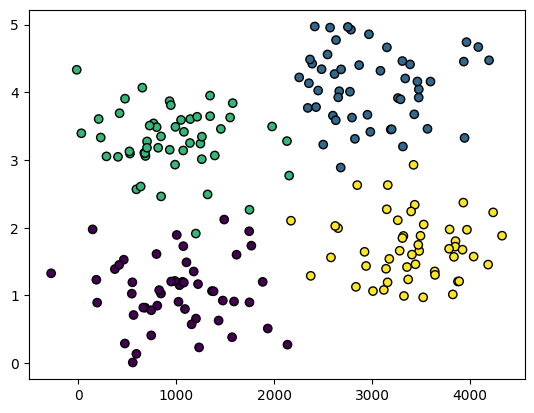

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1, max_iter=5000).fit(X, y)

In [ ]:
# print("Веса между входным и скрытым слоем:")
# print(clf.coefs_[0])
# print("\nВеса между скрытым и выходным слоем:")
# print(clf.coefs_[1])

# Веса между входным и скрытым слоями показывают, как входные данные (X0, X1)
# преобразуются в скрытые представления внутри нейронной сети.
# Это значение определяет, какие комбинации входных признаков важны для обучения.

# Веса между скрытым и выходным слоями показывают, как скрытые представления
# (на основе входных данных) влияют на предсказания модели для каждого класса.

In [ ]:
# for i in range(len(clf.coefs_)):
#     number_neurons_in_layer = clf.coefs_[i].shape[1]
#     for j in range(number_neurons_in_layer):
#         weights = clf.coefs_[i][:,j]
#         print(i, j, weights, end=", ")
#         print()
#     print()

In [ ]:
# print("Веса смещения для скрытого слоя:")
# print(clf.intercepts_[0])
# print("\nВеса смещения для выходного слоя:")
# print(clf.intercepts_[1])

In [ ]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

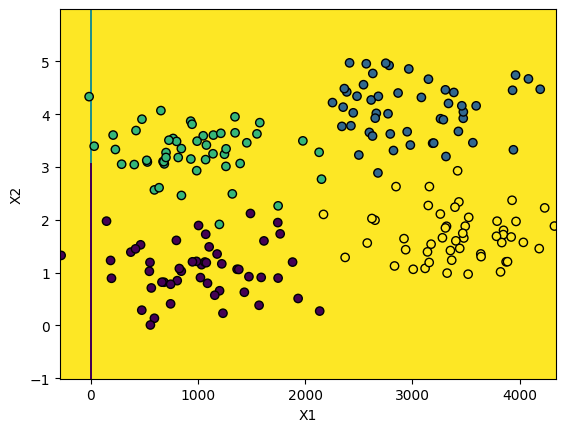

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Нормализовали данные

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X_scaled, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


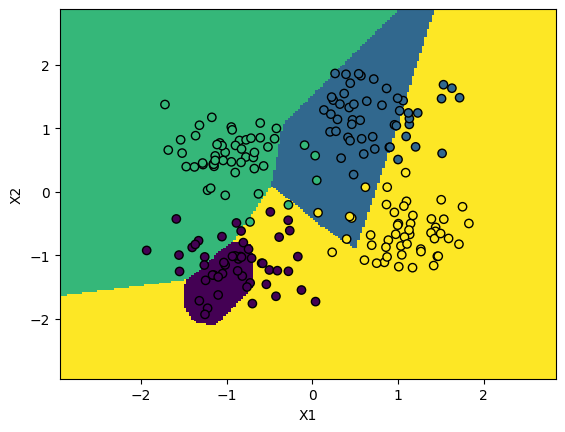

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Увеличи число итераций

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.37239528
Iteration 2, loss = 1.36955380
Iteration 3, loss = 1.36671768
Iteration 4, loss = 1.36388608
Iteration 5, loss = 1.36105976
Iteration 6, loss = 1.35823875
Iteration 7, loss = 1.35542024
Iteration 8, loss = 1.35260398
Iteration 9, loss = 1.34979262
Iteration 10, loss = 1.34698669
Iteration 11, loss = 1.34418660
Iteration 12, loss = 1.34139149
Iteration 13, loss = 1.33860129
Iteration 14, loss = 1.33581782
Iteration 15, loss = 1.33304240
Iteration 16, loss = 1.33027326
Iteration 17, loss = 1.32751397
Iteration 18, loss = 1.32476774
Iteration 19, loss = 1.32202705
Iteration 20, loss = 1.31929273
Iteration 21, loss = 1.31656500
Iteration 22, loss = 1.31384380
Iteration 23, loss = 1.31112907
Iteration 24, loss = 1.30842050
Iteration 25, loss = 1.30571687
Iteration 26, loss = 1.30301937
Iteration 27, loss = 1.30032649
Iteration 28, loss = 1.29763750
Iteration 29, loss = 1.29495368
Iteration 30, loss = 1.29227540
Iteration 31, loss = 1.28960261
Iteration 32, los

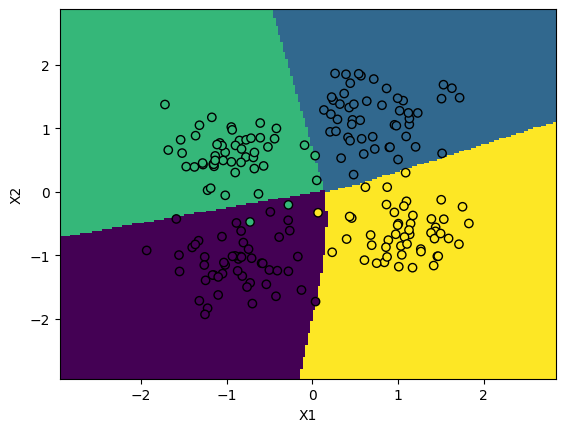

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Увеличили число скрытых слоев = 3

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)


print("Веса между слоями:")
for i in range(len(clf.coefs_)):
    print(f"\nСлой {i} - Веса:")
    weights = clf.coefs_[i]
    print(weights)

Веса между слоями:

Слой 0 - Веса:
[[ 1.07086823 -0.4086717  -0.48210068  0.80751578 -0.58132721  1.23943187]
 [-1.19247416 -1.20215554  0.13877058  0.90544883 -1.05378007 -0.17750137]]

Слой 1 - Веса:
[[ 0.3243528   0.46103341  0.07776377 -1.15526401 -0.14645228  1.04205059]
 [ 0.42188866 -0.19368107 -0.29023479 -0.92801353  0.06666421 -0.33336964]
 [ 0.62640416  0.19100123 -0.13630469  0.52705305  1.13748701 -0.3130317 ]
 [-0.54799205 -0.772741    0.80376509  0.11017977 -0.59489843 -0.02784011]
 [ 1.00923708 -1.10273594 -0.03155758 -0.16977242 -0.29594582  0.19506305]
 [ 0.34675873  0.69185578  0.41507491 -0.11740967 -0.64962028  0.40426482]]

Слой 2 - Веса:
[[-0.32856956 -0.19261069 -0.96166747 -0.70566301  0.93907955 -0.08596055]
 [ 0.25355981 -0.11702758  0.0109886  -0.61323525 -0.15219861  0.80853622]
 [-0.20784323 -0.53902776  0.72505938  0.78638023 -0.73599185  0.73570494]
 [-0.0115998   0.95812304  1.01041104  0.38679786 -0.57363223 -0.2987652 ]
 [-0.26722369  0.78755004  1.05

In [ ]:
# Выводим векторы смещения для скрытых и выходного слоя
print("\nВеса смещения для скрытых слоев:")
for i in range(len(clf.intercepts_)):
    print(f"\nСлой {i} - Веса смещения (biases):")
    biases = clf.intercepts_[i]
    print(biases)



Веса смещения для скрытых слоев:

Слой 0 - Веса смещения (biases):
[ 0.24332211  0.03755785  1.45224537  0.85467577 -0.30587393  0.81755289]

Слой 1 - Веса смещения (biases):
[-0.26904864  0.57447347  0.15452247  0.72604357  0.34662742  0.70657706]

Слой 2 - Веса смещения (biases):
[-0.65663293  0.69714026 -0.05919683  0.27555472 -0.32555213  0.2860285 ]

Слой 3 - Веса смещения (biases):
[ 1.08996613  0.17098385 -0.59278471  0.37939285]


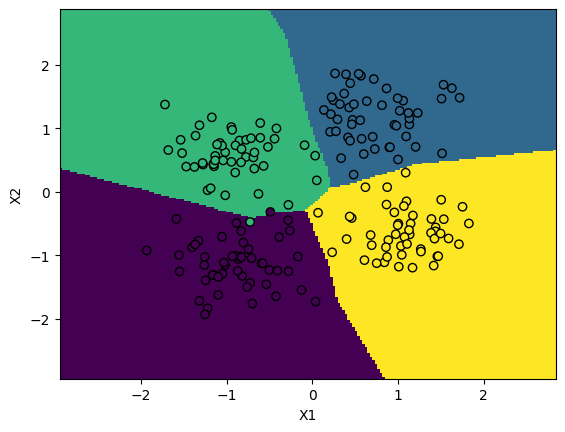

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Самостоятельное решение

## Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                  centers=blob_centers,
                  cluster_std=0.5,
                  random_state=0)

X[:, 0] *= 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# 1 нейрон
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность {accuracy:.4f}')

Точность 0.2333


In [ ]:
# 2 нейрона
clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность {accuracy:.4f}')

Точность 0.2833


In [ ]:
# 10 нейронов
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность {accuracy:.4f}')

Точность 0.3000


In [ ]:
# 100 нейронов
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность {accuracy:.4f}')

Точность 0.3000


## Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [ ]:
# 2 слоев
clf = MLPClassifier(hidden_layer_sizes=(5,) * 2, max_iter=5000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность {accuracy:.4f}')



Точность 0.2833


In [ ]:
# 3 слоев
clf = MLPClassifier(hidden_layer_sizes=(5,) * 3, max_iter=5000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность {accuracy:.4f}')

Точность 0.5833


In [ ]:
# 10 слоев
clf = MLPClassifier(hidden_layer_sizes=(5,) * 10, max_iter=5000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность {accuracy:.4f}')

Точность 0.5167


## Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
import time

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#Нейронов - 10, Слой - 1
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10_000, random_state=1)
clf.fit(X_scaled, y)
end_time = time.time()

training_time = end_time - start_time
accuracy = clf.score(X_scaled, y)

print(f"Скрытые слои: (10, )\nВремя обучения: {training_time:.4f} \nТочность: {accuracy:.4f}")


Скрытые слои: (10, )
Время обучения: 0.8195 
Точность: 0.9800


In [ ]:
#Нейронов - 50, Слой - 1
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10_000, random_state=1)
clf.fit(X_scaled, y)
end_time = time.time()

training_time = end_time - start_time
accuracy = clf.score(X_scaled, y)

print(f"Скрытые слои: (50, )\nВремя обучения: {training_time:.4f} \nТочность: {accuracy:.4f}")

Скрытые слои: (50, )
Время обучения: 0.5455 
Точность: 0.9900


In [ ]:
#Нейронов - 10, Слой - 2
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=10_000, random_state=1)
clf.fit(X_scaled, y)
end_time = time.time()

training_time = end_time - start_time
accuracy = clf.score(X_scaled, y)

print(f"Скрытые слои: (10, 10)\nВремя обучения: {training_time:.4f} \nТочность: {accuracy:.4f}")

Скрытые слои: (10, 10)
Время обучения: 0.6365 
Точность: 0.9900


In [ ]:
#Нейронов - 50, Слой - 2
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10_000, random_state=1)
clf.fit(X_scaled, y)
end_time = time.time()

training_time = end_time - start_time
accuracy = clf.score(X_scaled, y)

print(f"Скрытые слои: (50, 50)\nВремя обучения: {training_time:.4f} \nТочность: {accuracy:.4f}")

Скрытые слои: (50, 50)
Время обучения: 0.3605 
Точность: 0.9900


## Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")


print("Классификационный отчет:")
print(classification_report(y_test, y_pred))

# precision (точность) для каждого класса, например, для класса 0 — это доля правильных положительных предсказаний среди всех предсказанных как 0.

# recall (полнота) для каждого класса, например, для класса 0 — это доля реальных положительных значений, которые модель предсказала как 0.

# f1-score — гармоническое среднее между точностью и полнотой.

# support — количество экземпляров для каждого класса в тестовом наборе.

Точность модели: 1.0000
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадрат ошибка: {mse}")
print(f"Коэф детерм R^2: {r2}")


Среднеквадрат ошибка: 0.29930135699320576
Коэф детерм R^2: 0.7715969884493697


- Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.
- Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.
- Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.
- Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.
- Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).
- Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.